In [1]:
%matplotlib inline
from __future__ import (absolute_import, unicode_literals, division,
                        print_function)
from srttools.core.calibration import *
import numpy as np
import os



# Preliminaries

TBW

# Rapid calibration: Total power 

In the following, I will assume that all fits went perfectly. 
This is not the case, calibrators are not all very reliable, etc.
But still, it is good for first-order calibration.

In [2]:
# read config file
config_file_tp = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib.ini'))


Get the full table of scans, each fit with a linear + Gaussian function. 
If a source is in the calibrator list, the conversion between flux and counts is done automatically. 

In [3]:
full_table_tp = get_full_table(config_file_tp, channel='Ch0')


Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124434-scicom-3C48_001_003.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124452-scicom-3C48_001_004.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124511-scicom-3C48_001_005.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124528-scicom-3C48_001_006.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits
../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits is an invalid file
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124810-scicom-3C123_002_003.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124828-scicom-3C123_002_004.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124847-scicom-3C123_002_005.fits
Loading file ../../TEST_DAT

Here's the table as it is now. Notice the Flux = $1\pm0$ in Sources, and the correct values for calibrators



In [4]:
full_table_tp

Dir,File,Scan Type,Source,Time,Frequency,Bandwidth,Counts,Counts Err,Width,Flux Density,Flux Density Err,Kind,Elevation,Flux/Counts,Flux/Counts Err,RA,Dec,Fit RA,Fit Dec
str200,str200,str200,str200,float128,float64,float64,float64,float64,float64,float64,float64,str200,float64,float64,float64,float64,float64,float64,float64
20150624/tp/20150624-133709-scicom-3C279,20150624-133743-scicom-3C279_007_005.fits,RA>,3C279,57197.5679104,6900.0,680.0,249.035128039,0.902199869335,0.0183056957221,0.00147058823529,0.0,Source,12.7482424791,0.00401549776481,1.45472712515e-05,194.0465275,-5.78931241667,194.051071554,nan
20150624/tp/20150624-133709-scicom-3C279,20150624-133801-scicom-3C279_007_006.fits,RA<,3C279,57197.5681089,6900.0,680.0,247.478423703,0.880833541398,0.0181929784203,0.00147058823529,0.0,Source,12.7701682421,0.00404075630125,1.43819959312e-05,194.0465275,-5.78931241667,194.051109273,nan
20150624/tp/20150624-141202-scicom-3C123,20150624-141202-scicom-3C123_002_003.fits,Dec>,3C123,57197.5917317,6900.0,680.0,150.56994131,0.395464237737,0.0184073883199,11.3335366754,0.0,Calibrator,36.6068445113,51.1842195875,0.134432730778,69.2682304167,29.6705052778,nan,29.6749125997
20150624/tp/20150624-141202-scicom-3C123,20150624-141219-scicom-3C123_002_004.fits,Dec<,3C123,57197.5919291,6900.0,680.0,147.768357152,0.300197402876,0.0189105624933,11.3335366754,0.0,Calibrator,36.5799673405,52.154636404,0.105954256366,69.2682304167,29.6705052778,nan,29.675927956
20150624/tp/20150624-141202-scicom-3C123,20150624-141238-scicom-3C123_002_005.fits,RA>,3C123,57197.5921571,6900.0,680.0,151.250840387,0.388063614065,0.0186259943527,11.3335366754,0.0,Calibrator,36.4952688325,50.9537991297,0.130731937687,69.2682304167,29.6705052778,69.2645749309,nan
20150624/tp/20150624-141202-scicom-3C123,20150624-141256-scicom-3C123_002_006.fits,RA<,3C123,57197.5923556,6900.0,680.0,149.978058941,0.376497069726,0.0185420066959,11.3335366754,0.0,Calibrator,36.4659260834,51.3862160485,0.128997267355,69.2682304167,29.6705052778,69.264704941,nan
20150624/tp/20150624-131106-scicom-3C286,20150624-131106-scicom-3C286_004_003.fits,Dec>,3C286,57197.5494174,6900.0,680.0,77.4655427962,0.201802985023,0.0183292928155,5.90956574463,0.0,Calibrator,23.3655005998,51.8747376097,0.135137204479,202.784530833,30.5091552778,nan,30.5042062298
20150624/tp/20150624-131106-scicom-3C286,20150624-131140-scicom-3C286_004_005.fits,RA>,3C286,57197.5498184,6900.0,680.0,77.1099470387,0.246781364791,0.0184482187157,5.90956574463,0.0,Calibrator,23.4893906533,52.1139601397,0.166784632876,202.784530833,30.5091552778,202.788425312,nan
20150624/tp/20150624-131106-scicom-3C286,20150624-131158-scicom-3C286_004_006.fits,RA<,3C286,57197.5500175,6900.0,680.0,77.0996251447,0.244040904113,0.0183240913977,5.90956574463,0.0,Calibrator,23.5220970994,52.1209370189,0.164976685288,202.784530833,30.5091552778,202.789081967,nan


To select the calibrator and the source data from the table, it is sufficient to do

In [5]:
calibrator_table_tp = full_table_tp[full_table_tp["Kind"] == "Calibrator"]

# Similarly for the source table
source_table_tp = full_table_tp[full_table_tp["Kind"] == "Source"]


To obtain the mean calibration values and their errors (Jansky/Counts), we take the `Flux / Counts` column and normalize by the bandwidth

In [6]:
fc = np.mean(calibrator_table_tp["Flux/Counts"]) / calibrator_table_tp["Bandwidth"][0]
fce = np.sqrt(np.sum(calibrator_table_tp["Flux/Counts Err"] ** 2))\
    / len(calibrator_table_tp) / calibrator_table_tp["Bandwidth"][0]

Then, the calibrated source flux can be obtained through

In [7]:
source_table_tp["Flux"] = source_table_tp["Counts"] * fc
source_table_tp["Flux Err"] = \
    (source_table_tp["Counts Err"] / source_table_tp["Counts"] + fce / fc) * \
    source_table_tp["Flux"]

Let's look at 3C279 data

In [8]:
filtered = source_table_tp[source_table_tp["Source"] == "3C279"]
print(filtered[("Source", "Counts", "Counts Err", "Flux", "Flux Err")])

Source     Counts      Counts Err        Flux         Flux Err   
------ ------------- -------------- ------------- ---------------
 3C279 249.035128039 0.902199869335 18.7090295197 0.0732864494089
 3C279 247.478423703 0.880833541398 18.5920804466 0.0716468527846
 3C279 238.956086964  2.72222036948 17.9518308124  0.209794519464
 3C279 246.802556627  5.76380338467 18.5413052119  0.438470220928
 3C279 348.915038069  9.92934077366 26.2126142544  0.753669003459
 3C279 259.224171234  2.19641005498 19.4744922535  0.170740712906
 3C279 264.041857676  6.51269296828 19.8364260841  0.495112618007
 3C279 247.587364445  22.3522667125  18.600264736   1.68471357235
 3C279 244.299070999  1.02429990028 18.3532281849 0.0823546006137
 3C279 248.783964424  1.12546318996 18.6901605853 0.0900537896221
   ...           ...            ...           ...             ...
 3C279 265.186245348  5.77362243928 19.9223994281  0.439614466067
 3C279 280.638252144  2.66992918555 21.0832479139  0.206787941558
 3C279 273

If we want to play it fancy, we can obtain a histogram of the calibrated fluxes, finding possible outliers.

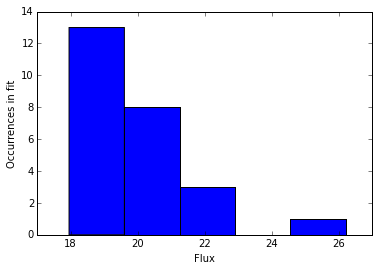

In [9]:
from astropy.visualization import hist
_ = hist(filtered["Flux"], bins='knuth')
plt.xlabel("Flux")
plt.ylabel("Occurrences in fit")

The function `show_calibration` plots this and the calibrator data.

Source  Flux Density  Flux Density Err     Counts      Counts Err  
------ ------------- ----------------- ------------- --------------
 3C279 18.7090295197 0.000107774190307 249.035128039 0.902199869335
 3C279 18.5920804466 0.000105363018801 247.478423703 0.880833541398
 3C279 17.9518308124 0.000308521352153 238.956086964  2.72222036948
 3C279 18.5413052119 0.000644809148423 246.802556627  5.76380338467
 3C279 26.2126142544  0.00110833676979 348.915038069  9.92934077366
 3C279 19.4744922535 0.000251089283686 259.224171234  2.19641005498
 3C279 19.8364260841 0.000728106791187 264.041857676  6.51269296828
 3C279  18.600264736  0.00247751995934 247.587364445  22.3522667125
 3C279 18.3532281849 0.000121109706785 244.299070999  1.02429990028
 3C279 18.6901605853 0.000132432043562 248.783964424  1.12546318996
   ...           ...               ...           ...            ...
 3C279 19.9223994281 0.000646491861863 265.186245348  5.77362243928
 3C279 21.0832479139 0.000304099914056 280.63825

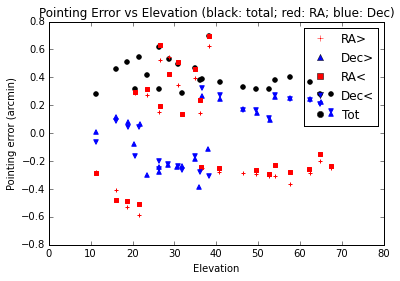

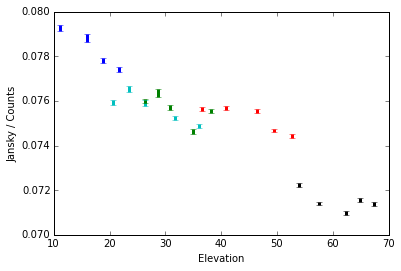

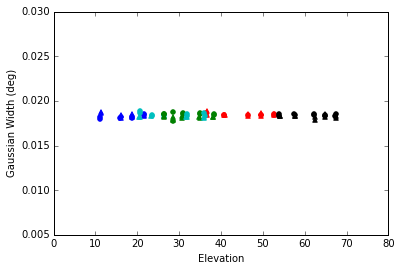

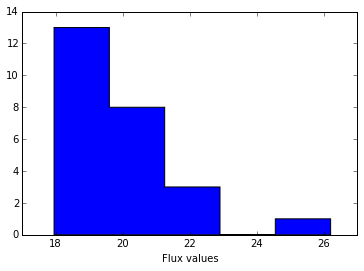

In [10]:
show_calibration(full_table_tp)

There seems to be a strong dependence on elevation.
Let's see if results with Channel 1 are consistent.

In [11]:
%%capture shutup
full_table_tp1 = get_full_table(config_file_tp, channel='Ch1')

# ----- This time I captured the output of the function above, full of "loading file..." 
# and "saving to file...", not very informative

Source  Flux Density  Flux Density Err     Counts      Counts Err  
------ ------------- ----------------- ------------- --------------
 3C279 18.5354887066 0.000134716294427 287.828577647  1.32193113309
 3C279 18.3125392639  0.00012455217717 284.366504324  1.21581419532
 3C279 19.7320049547 8.28008298449e-05 306.408695781 0.767242157874
 3C279 19.9362008998 0.000154170671546 309.579555172   1.5197559137
 3C279 19.7704036729 9.44057556417e-05 307.004970776 0.889574695201
 3C279   20.38081931 0.000111299162172 316.483817941  1.06464606727
 3C279 20.7231098149 0.000188240806048 321.799080503  1.87524522081
 3C279 20.5520722752 0.000149847306892 319.143121842  1.47076154082
 3C279 19.6857016008 0.000100199436019 305.689673546 0.951212090512
 3C279 20.9326122508 9.28979580887e-05 325.052341806 0.867346062183
   ...           ...               ...           ...            ...
 3C279  102.94191638  0.00847830764104 1598.53488844  88.9670896927
 3C279 83.8701085917  0.00381980083708 1302.3780

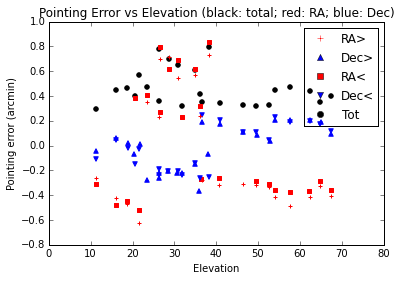

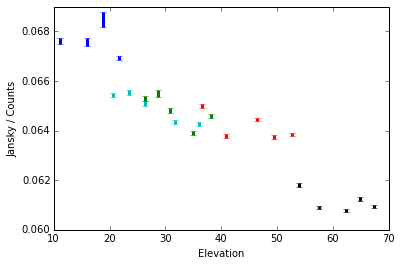

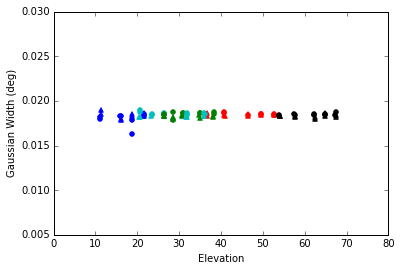

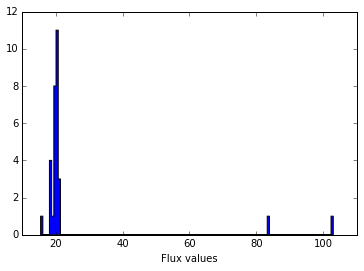

In [12]:
show_calibration(full_table_tp1)

Results for Channel 1 are largely consistent. Encouraging!

# And the Roach 2 data?

In [13]:
config_file_r2 = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib_roach.ini'))



In [14]:
%%capture shutup
full_table_r2 = get_full_table(config_file_r2, channel='Ch0')

Source  Flux Density  Flux Density Err     Counts      Counts Err 
------ ------------- ----------------- ------------- -------------
 3C279 14.2338279218 5.56619818402e-05 4705988.60476  24794.110877
 3C279 14.3063883591 5.58502071446e-05 4729978.53868 24873.1310704
 3C279 14.8725834609 0.000270892967913 4917173.97982 131407.506866
 3C279 15.9057806362 8.13149766784e-05  5258769.6602 37186.0900709
 3C279 14.9913380036 6.28529851028e-05 4956436.61022 28210.7820524
 3C279 14.8190413096 0.000217648126903 4899471.87219 105012.361927
 3C279 15.6489935001 0.000110915499946 5173870.68975 51916.5791317
 3C279 14.2179284018 5.54219482416e-05   4700731.905 24678.2102176
 3C279 14.3661670086   5.718808642e-05 4749742.55753 25524.8228545
 3C279 15.4069219525 0.000290040010368 5093836.98757 140797.600259
   ...           ...               ...           ...           ...
 3C279 15.7831197072 0.000114499459972 5218215.50026 53667.4906004
 3C279 16.7141192294 0.000168945740516 5526022.58958 80485.219

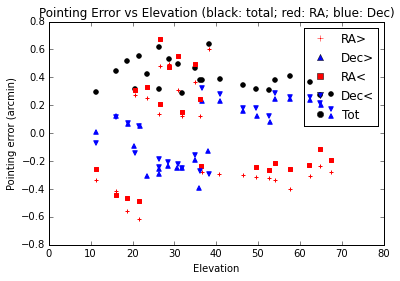

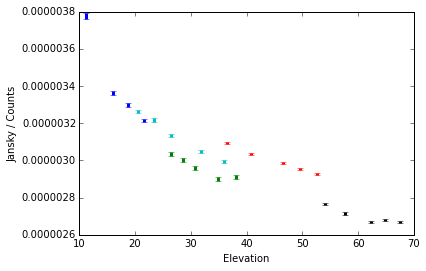

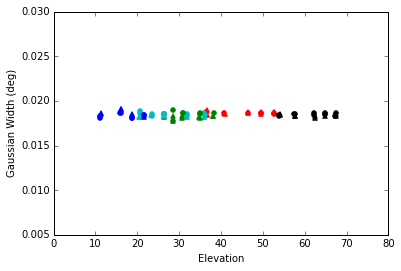

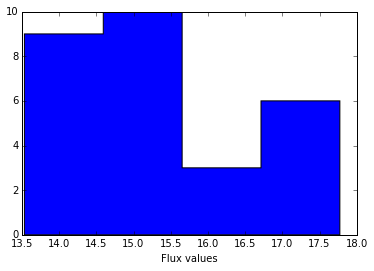

In [15]:
show_calibration(full_table_r2)

In [16]:
%%capture shutup
full_table_r21 = get_full_table(config_file_r2, channel='Ch1')

Source  Flux Density  Flux Density Err     Counts      Counts Err 
------ ------------- ----------------- ------------- -------------
 3C279 15.1015809111 5.87065788924e-05 4096579.60703 21372.7606559
 3C279 14.9355288636 5.65900634358e-05  4051534.9567 20539.2005239
 3C279 17.6562821447 9.68325828729e-05 4789588.97058 36460.8512107
 3C279 18.0833033281 6.77102209934e-05 4905426.26481 24539.7743997
 3C279 16.6660087495  5.1512621155e-05 4520959.22775 18184.9750261
 3C279 16.3107193591 4.59106856357e-05 4424580.49233  15964.705588
 3C279 21.9885241317 0.000614721745929  5964788.7249 246469.679441
 3C279 13.8602534076 0.000470034096522 3759846.85261 188949.648274
 3C279 16.7380943979 0.000491733208669 4540513.77631  197299.78005
 3C279 17.1682892531 6.27967120742e-05   4657211.987 22692.8465173
   ...           ...               ...           ...           ...
 3C279 17.9143788037 6.57009662464e-05 4859602.40269 23750.3373027
 3C279 17.9863753466  5.5876789692e-05 4879132.77975 19740.865

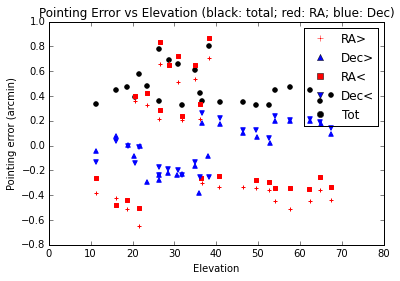

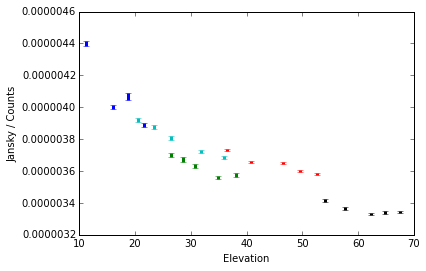

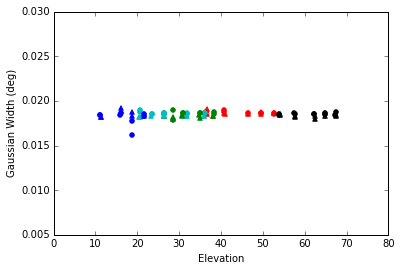

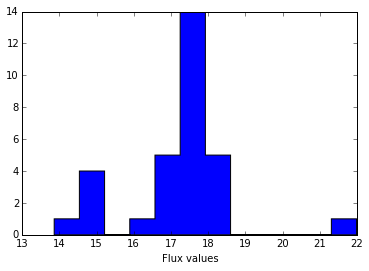

In [17]:
show_calibration(full_table_r21)

Notice that for Roach 2 data the results are largely consistent. But:

* Error bars of calibrators are lower
    
* Flux values for the source are lower

* Conversion factors for calibrators show a strong dependence on elevation and / or flux

These things are worth further investigation.

# Behavior of single calibrators

Let's see where this apparent discrepancy can come from, by plotting all curves that correspond to a given calibrator

## Total power

../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125057-scicom-3C147/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125455-scicom-3C286/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125721-scicom-3C295/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130110-scicom-3C48/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130416-scicom-3C123/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130703-scicom-3C147/summary.fits is an invalid file
fit failed
../../TEST_DATASET/20150624/tp/20150624-131106-scicom-3C286/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-131333-scicom-3C295/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-131722-scicom-3C48/summary.fits

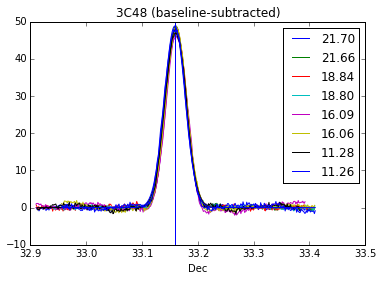

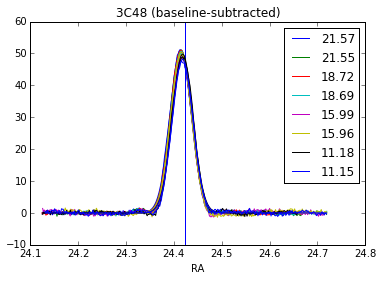

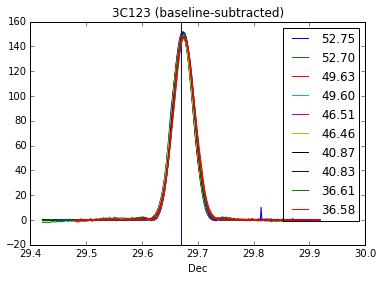

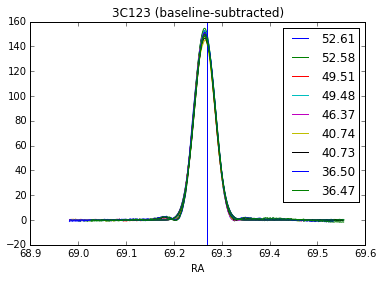

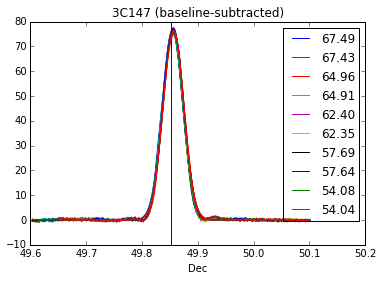

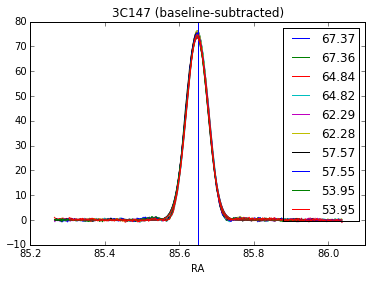

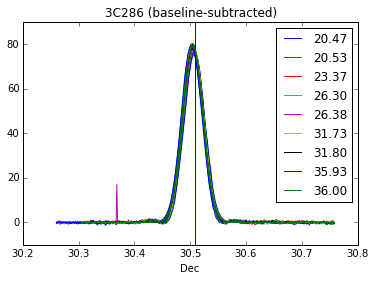

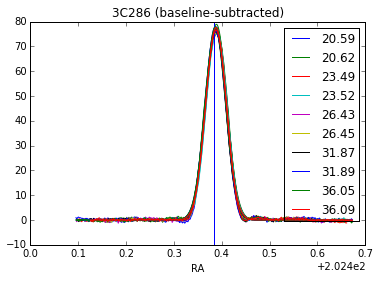

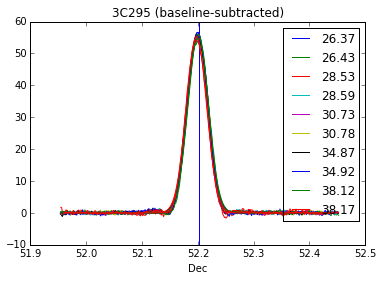

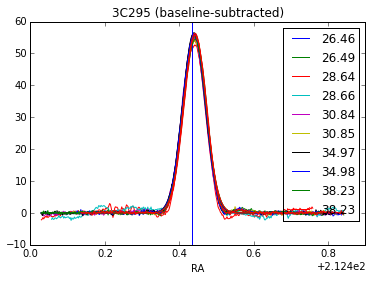

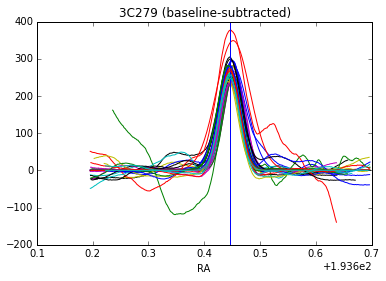

In [18]:
_ = get_full_table(config_file_tp, channel='Ch0', plotall=True, verbose=False)
plt.show()

In some scans, there is an apparent movement of the Gaussian maximum. This might be due to slight pointing errors, but there is no strong evidence (from the Pointing error vs Elevation plots abeve) that this might produce the steep dependence of calibration on elevation. But there is also a slight change of the Gaussian intensity in these curves. This might be related to elevation. Let's look at the Roach data

## Roach 2

fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed


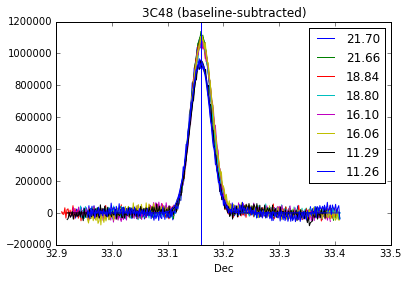

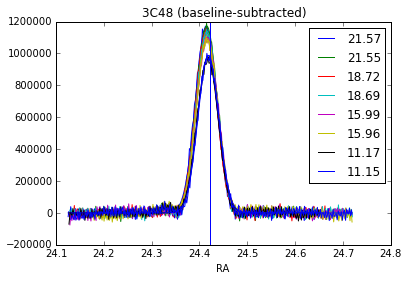

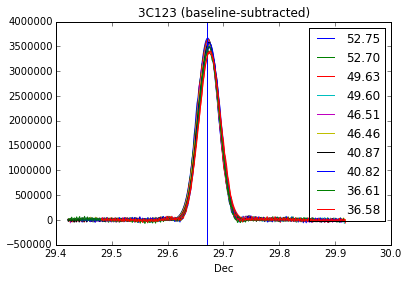

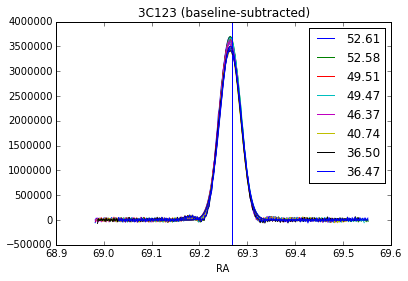

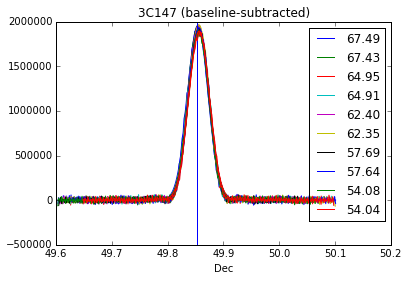

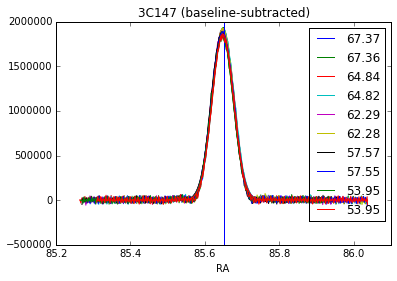

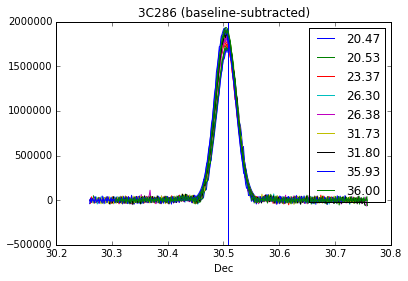

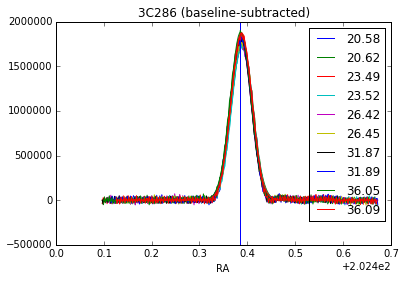

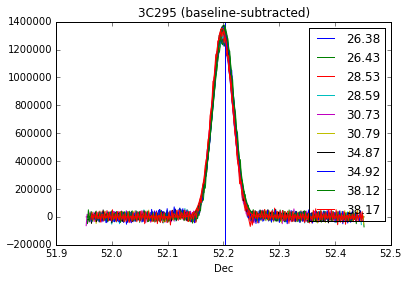

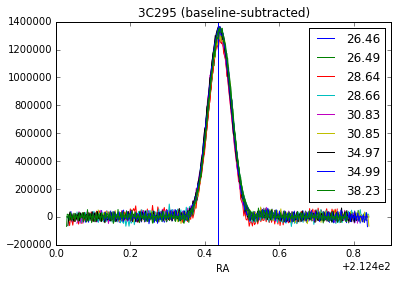

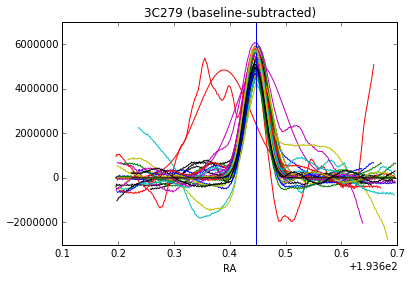

In [19]:
_ = get_full_table(config_file_r2, channel='Ch0', plotall=True, verbose=False)
plt.show()

Here, the change of the Gaussian amplitude is more extreme than in the total power curves. In some sources, like 3C48, the change of intensity is very large. Lower amplitudes at lower elevation, and this might indeed be related to a change of opacity. 